# EDA On Data Science Job Salaries Dataset 

# Table of Content 

### I. Notebook Objectives  
### II. What is Data Science 
### III. Import Library 
### IV. Summaries Data Set 
### V. Data Analysis 
### VI. Import New Data Set
### VII. Conclusion 
### VIII. References 


# I. Notebook Objectives  

### The objective of this notebook is to analyze and investigate salary trends in the field of data science across different positions and geographical locations worldwide. By examining salary data obtained from ai-jobs.net, we aim to gain insights into the factors influencing salary variations and understand how data analysis techniques can be utilized to extract meaningful insights from the dataset.

### Specific Objectives:
### - Understand how to analyze data to derive meaningful insights and trends.
### - Investigate salary distributions and variations across different positions within the field of data science.
### - Explore geographical differences in salary trends for data science positions around the world.
### - Utilize data visualization techniques to present findings and enhance understanding.

### Note: This notebook is intended for educational purposes and skill improvement. It should not be considered as formal research or a professional paper.

# II. What is Data Science 

### Data science is a field that uses a mix of methods, algorithms, and tools to understand and make sense of different types of data. It combines ideas from statistics, math, computer science, and specific areas of expertise to analyze and interpret complex data sets. The data science lifecycle begins with business understanding, followed by data mining, data cleaning, exploration, advanced analytics, and insights visualization.

### Data science is also pivotal for modern organizations, facilitating informed decision-making through data-driven insights and predictive analytics. It empowers businesses to anticipate trends and risks, driving proactive strategies. By transforming raw data into actionable insights, data science enhances business intelligence, fostering a deeper understanding of operations, customers, and markets for improved competitiveness.

### Due to their significant value to organizations, data science positions are characterized by high demand and high compensation. In light of this, we aim to conduct an in-depth analysis of data science salaries spanning the years 2021 to 2024, to examine trends and patterns through comprehensive data analysis and visualization techniques

# III. Import library 

In [21]:
# Import image 
from IPython.display import Image
# Data analysis 
import pandas as pd
pd.plotting.register_matplotlib_converters() 
import numpy as np

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import datetime as dt
import warnings
import plotly.graph_objects as go


## IV. Summaries Dataset 

In [22]:
df=pd.read_csv('/Users/thienphuquach/Desktop/Research Paper/ds_salaries.csv')
df.head(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


### work_year: The year the salary was paid.
### experience_level: Experience level at the job during the year
### employment_type: Type of employment (PT-Part-time, FT-Full-time, CT-Contract, FL-Freelance)
### job_title: Job role during the year
### salary: Total gross salary amount
### salary_currency: Currency of salary, paid as an ISO 4217 currency code
### salary_in_usd: Salary in USD
### employee_residence: Employee's primary country of residence, as an ISO 3166 country code
### remote_ratio: Overall amount of work done remotely
### company_location: Country of employer's main office or contracting branch, as an ISO 3166 country code
### company_size: Amount of people worked for the company

In [23]:
# Checking the type of each 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [24]:
# Convert the "remote_ratio" column to text
df['remote_ratio'] = df['remote_ratio'].astype(str)

# Verify the changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    object
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(4), object(8)
memory usage: 57.0+ KB


In [25]:
df['remote_ratio'].replace({'0':'No remote','50':'Partially remote','100':' Fully remote'},inplace=True)
df['company_size'].replace({'L':'Large','S':'Small','M':'Medium'},inplace=True)
df=df.drop('Unnamed: 0',axis=1)
df 

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,No remote,DE,Large
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,No remote,JP,Small
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,Partially remote,GB,Medium
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,No remote,HN,Small
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,Partially remote,US,Large
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,Fully remote,US,Medium
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,Fully remote,US,Medium
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,No remote,US,Medium
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,Fully remote,US,Medium


In [26]:
# Replace Acronym 
df['experience_level'].replace({'EN':'Entry Level','MI':'Intermediate','EX':'Expert','SE':'Senior'},inplace=True)
df['employment_type'].replace({'PT':'Part-Time','FT':'Full-Time','CT':'Contract','FL':'Freelance'},inplace=True)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Intermediate,Full-Time,Data Scientist,70000,EUR,79833,DE,No remote,DE,Large
1,2020,Senior,Full-Time,Machine Learning Scientist,260000,USD,260000,JP,No remote,JP,Small
2,2020,Senior,Full-Time,Big Data Engineer,85000,GBP,109024,GB,Partially remote,GB,Medium
3,2020,Intermediate,Full-Time,Product Data Analyst,20000,USD,20000,HN,No remote,HN,Small
4,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,150000,US,Partially remote,US,Large
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Full-Time,Data Engineer,154000,USD,154000,US,Fully remote,US,Medium
603,2022,Senior,Full-Time,Data Engineer,126000,USD,126000,US,Fully remote,US,Medium
604,2022,Senior,Full-Time,Data Analyst,129000,USD,129000,US,No remote,US,Medium
605,2022,Senior,Full-Time,Data Analyst,150000,USD,150000,US,Fully remote,US,Medium


In [27]:
#Checking for null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# V. Data Analysis 

## 1) Experience Level 

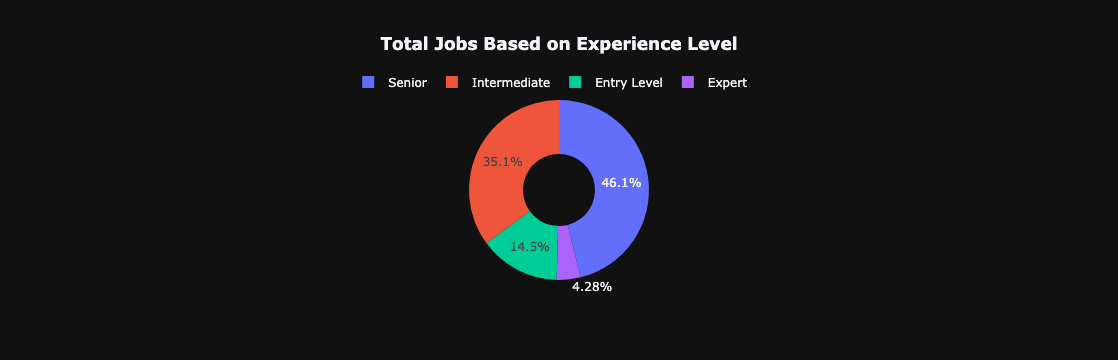

In [28]:
# Group the DataFrame by 'experience_level' and calculate the count of job listings
experience_counts = df.groupby('experience_level', as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd', ascending=False)

# Create the pie chart using Plotly Express
fig = px.pie(
    experience_counts,
    names='experience_level',
    values='salary_in_usd',
    color='experience_level',
    hole=0.4,
    labels={'experience_level': 'Experience Level', 'salary_in_usd': 'Count'},
    template='plotly_dark',
    title='<b>Total Jobs Based on Experience Level'
)

# Update the layout to adjust title position and legend orientation
fig.update_layout(
    title_x=0.5,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=0.8, 
       
    )
)

# Show the pie chart
fig.show()

#### In this dataset, as seen from the treemap above, it's evident that Senior and Intermediate levels together make up more than 80%, while entry and expert levels account for only 14.5% and 4.28%, respectively.

#### The predominance of Senior and Intermediate levels in this dataset may be attributed to several factors. Primarily, a significant proportion of individuals in these roles hold advanced degrees, such as Master's and PhDs, which are typically associated with positions beyond entry-level.

#### Drawing from the methodology employed by Rosanne Bollen in "Competencies of the Sexiest Job of the 21st Century: Developing and Testing a Measurement Instrument for Data Scientists," our analysis involves a quantitative cross-sectional questionnaire research to assess the validity of our revised competency framework (Bollen, Competencies of the Sexiest Job of the 21st Century: Developing and Testing a Measurement Instrument for Data Scientists  2017). Examining Sample 1, it is notable that 68.4% of respondents possess a Master's degree, while 6.6% have attained a PhD or other advanced degree, indicating a high level of educational attainment within the field. Additionally, age and experience play a significant role, with individuals aged 26-30, 31-35, and 36-40 collectively constituting over 70% of the sample.



## 2) Popular Role in Data Science 

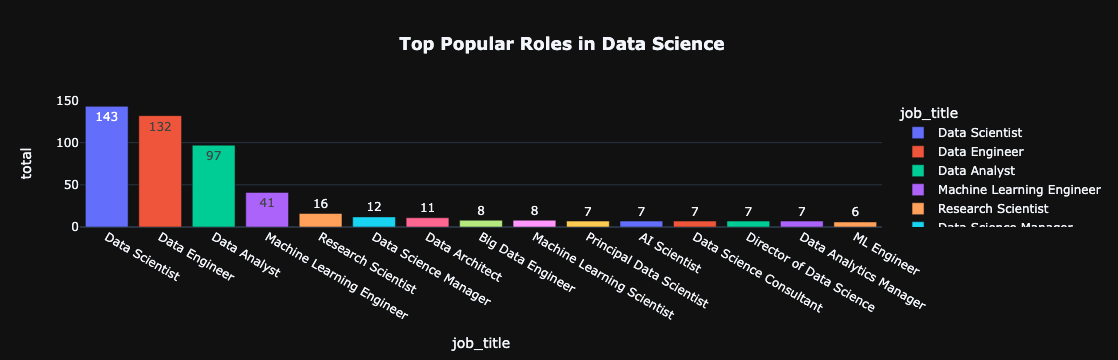

In [29]:
z=df['job_title'].value_counts().head(15)
fig=px.bar(z,x=z.index,
           y=z.values,
           color=z.index,
           text=z.values,
           labels={'index':'Job Title','y':'total','text':'count'},
           template='plotly_dark',
           title='<b> Top Popular Roles in Data Science')
fig.update_layout(title_x=0.5)
fig.show()

#### The demand for Data Scientists, Data Engineers, and Data Analysts is evidently high worldwide. Particularly in the United States, as indicated by research such as "A Data Science Approach to Defining a Data Scientist" by Andy Ho, data collected from Indeed in 16 major American cities revealed approximately 8,738 job postings for these roles. It's worth noting that this dataset does not encompass other hiring platforms like LinkedIn. Within this dataset, there were nearly 1,742 positions specifically for Data Scientists.(Ho et al., A Data Science Approach to Defining a Data Scientist 2019)






## 2) Salaries in Data Science field

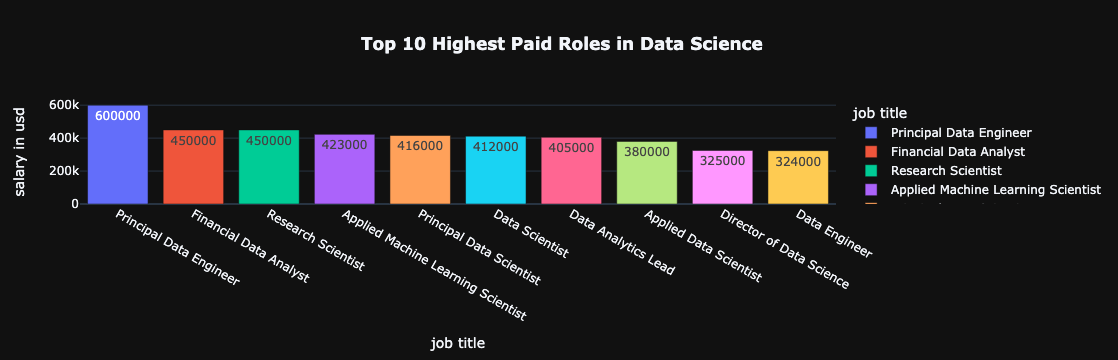

In [30]:
fig=px.bar(df.groupby('job_title',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',
            ascending=False).head(10),
           x='job_title',
           y='salary_in_usd',
           color='job_title',
           labels={'job_title':'job title','salary_in_usd':'salary in usd'},
           template='plotly_dark',
           text='salary_in_usd',
           title='<b> Top 10 Highest Paid Roles in Data Science')
fig.update_layout(title_x=0.5)
fig.show()

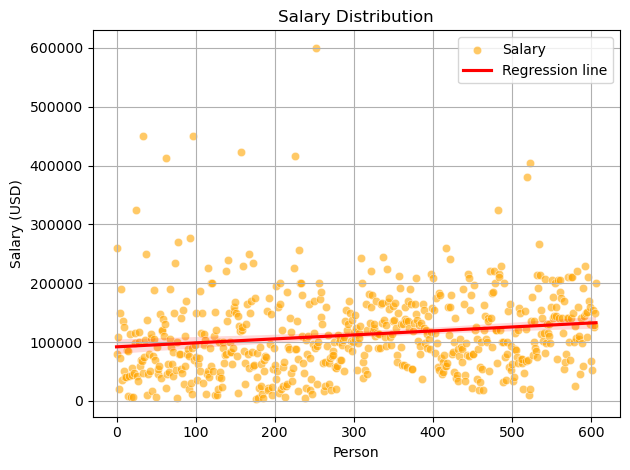

In [31]:
sns.scatterplot(x=df.index, y='salary_in_usd', data=df, color='orange', alpha=0.6, label='Salary')
sns.regplot(x=df.index, y='salary_in_usd', data=df, scatter=False, color='red', label='Regression line')

# Customize the plot
plt.title('Salary Distribution')
plt.xlabel('Person')
plt.ylabel('Salary (USD)')
plt.legend()  # Show legend with labels
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

## 4) Remote ratio 

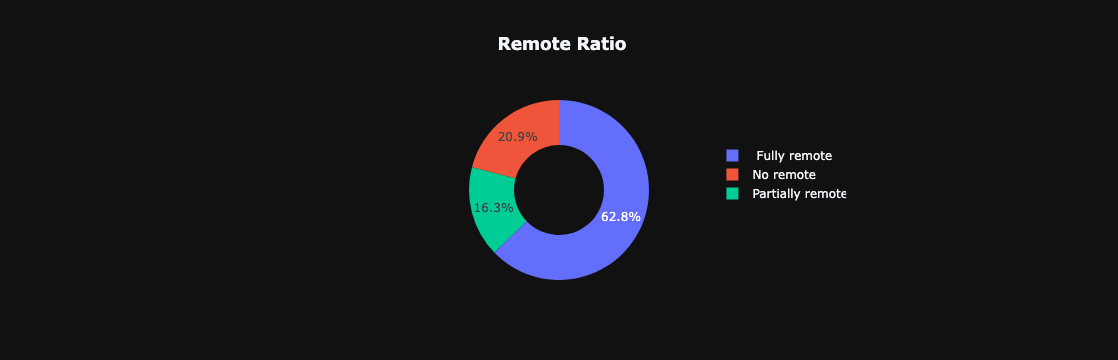

In [32]:
fig=px.pie(df.groupby('remote_ratio',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False),
           names='remote_ratio',
           values='salary_in_usd',
           color='remote_ratio',
           hole=0.5,
           labels={'remote_ratio':'remote ratio','salary_in_usd':'count'},
           template='plotly_dark',
           title='<b> Remote Ratio')
fig.update_layout(
    title_x=0.5,
    legend=dict(
        yanchor='bottom',
        y=0.4,
        xanchor='right',
        x=0.8, 
    )
)

#### After the COVID-19 pandemic, many companies have embraced remote work, especially in the IT/Data field where it's often feasible. This shift has given organizations ample opportunities to redefine their programming teams' work environment. They can tailor everything from office layout ergonomics to upgrading infrastructure and providing better tools, all while enhancing flexibility in work hours and formats. Determining which factors truly influence team efficiency and effectiveness can be challenging. According to this dataset, approximately 62.8% of people are now working fully remotely, compared to just around 21% who continue to work on-site.(Rot et al., Programming teams in Remote Working Environments: An analysis of performance and productivity 2023)




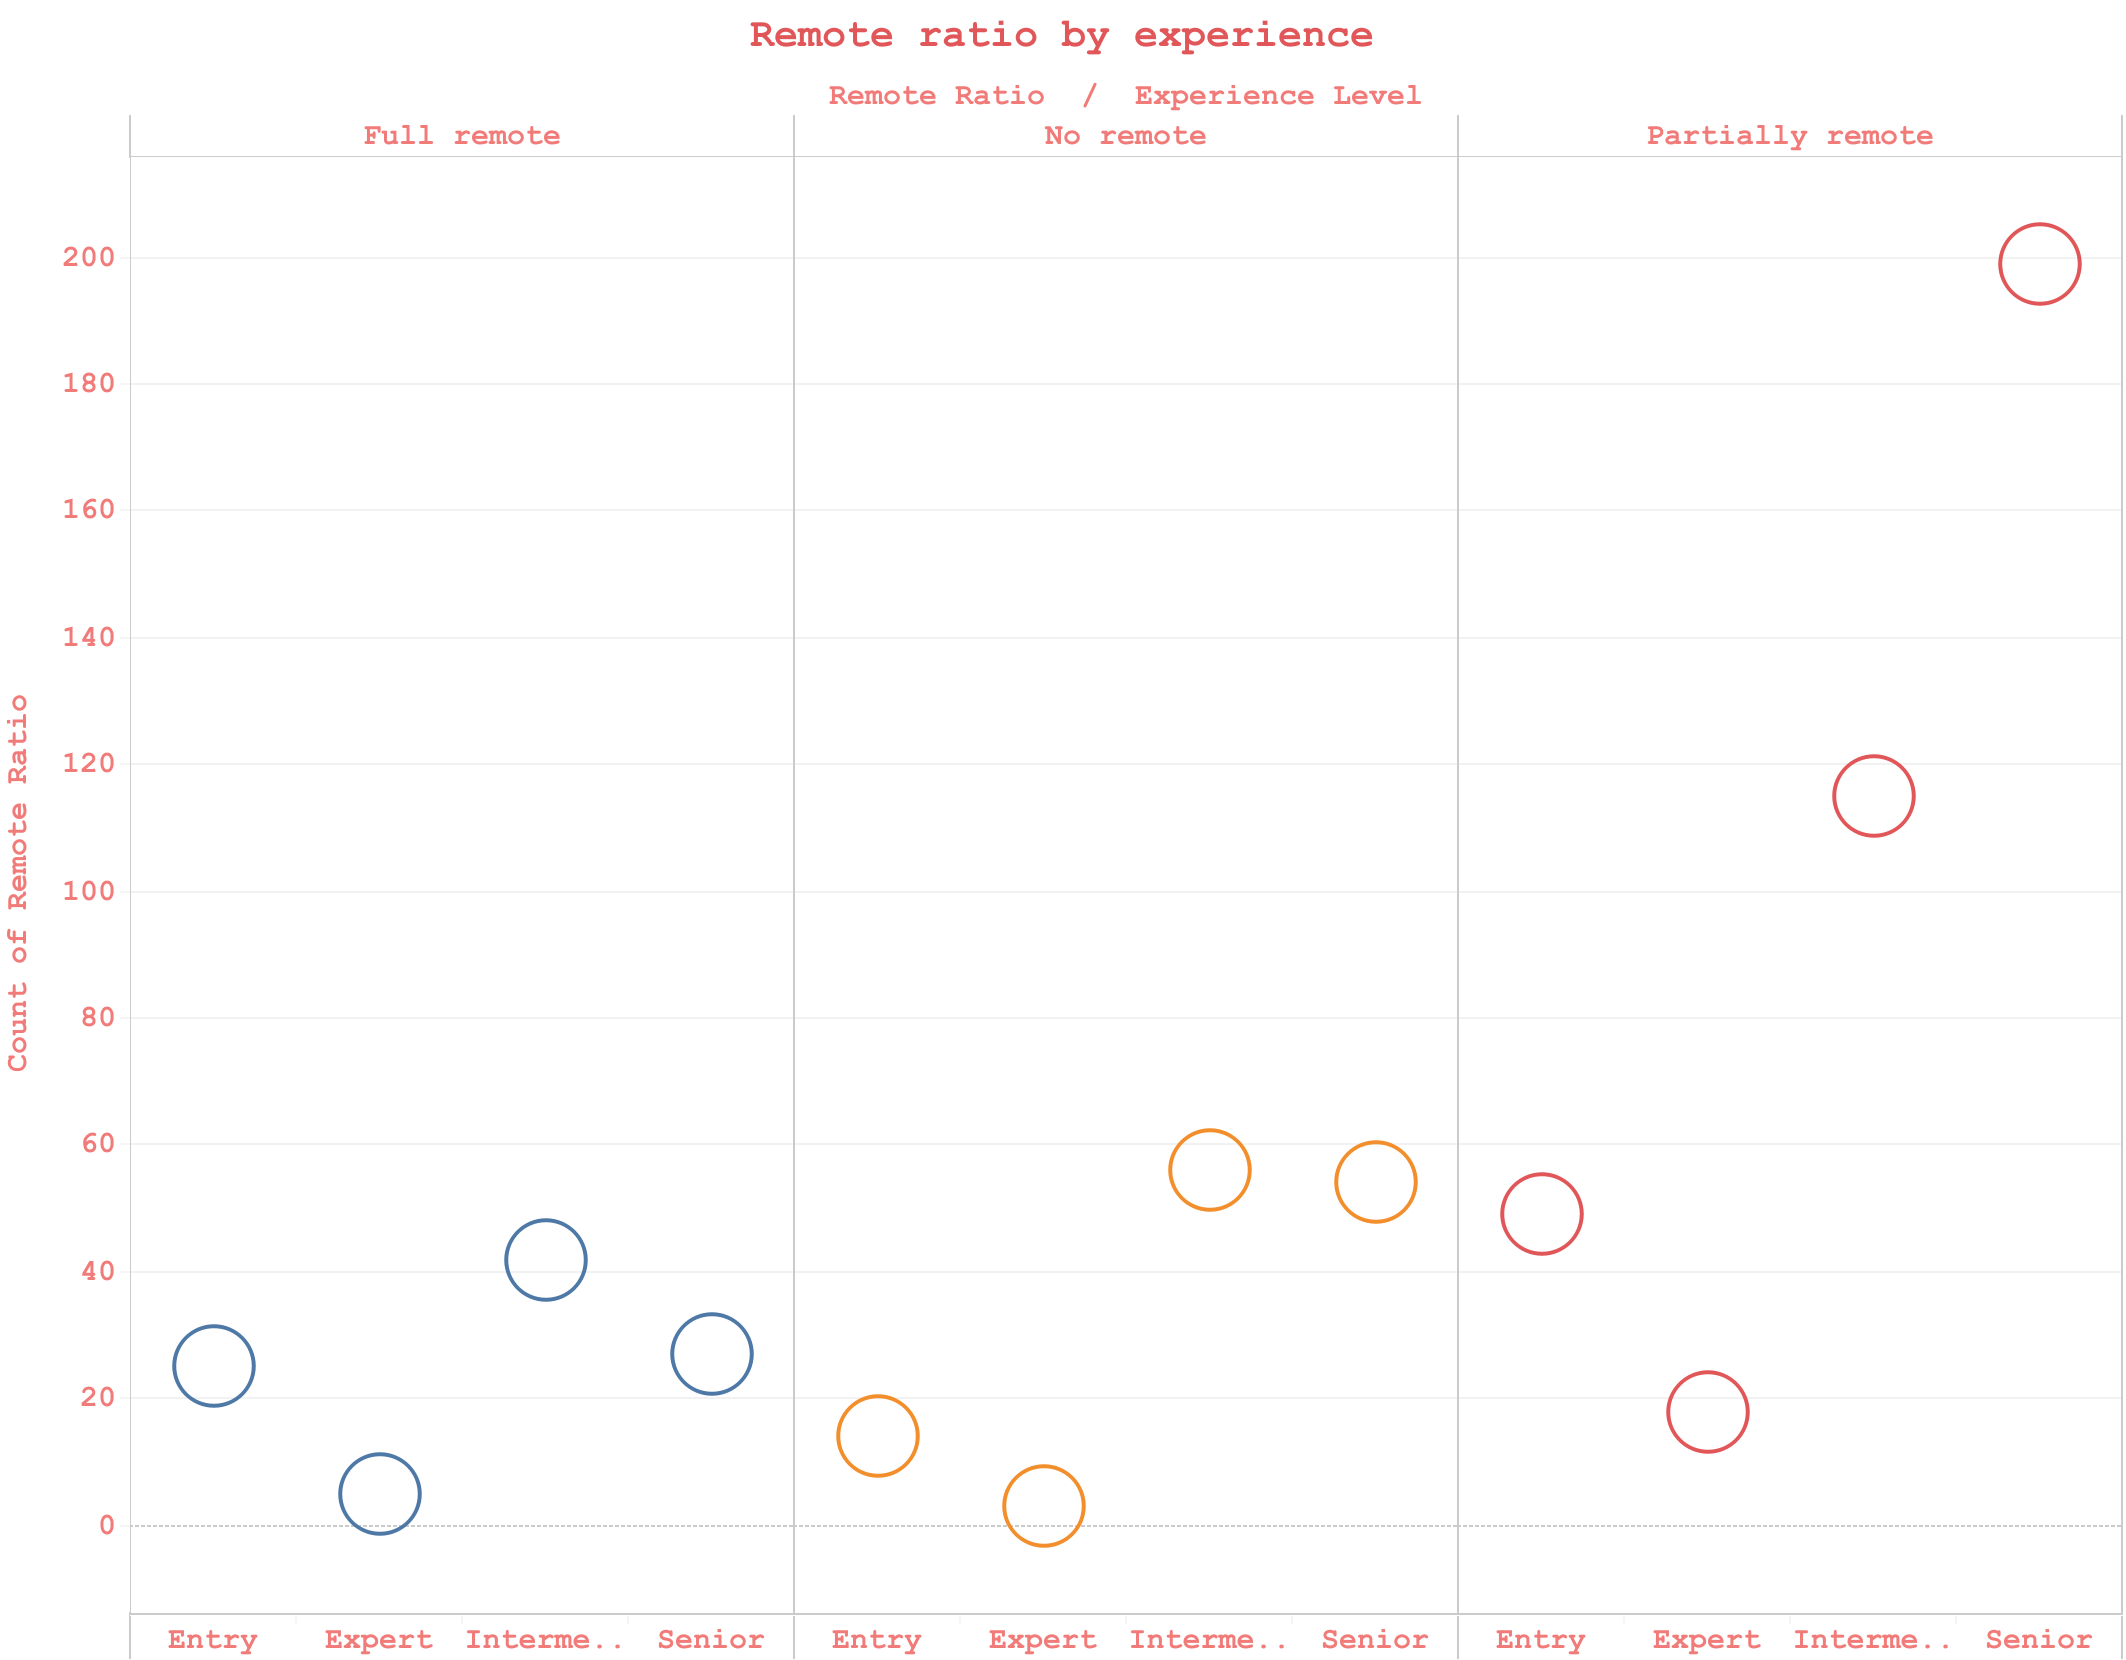

In [33]:
Image(filename='/Users/thienphuquach/Desktop/Research Paper/DS/Remote ratio by experience.png')

## 5) Company Size 

                                ### Figure 1: Remote ratio by experience level (Created by Phu Quach)

#### Despite the substantial prevalence of remote work arrangements, recent research, such as that conducted by Artur Rot, Malgorzata Sobinska and Peter Busch in "Programming Teams in Remote Working Environments: an Analysis of Performance and Productivity," highlights a noteworthy finding. Namely, it reveals the apparent absence or marginal negative impact of remote work on the operational efficiency of development teams. 
#### However, junior developers manifest a distinct sentiment, characterized by a perceived constraint in articulating and resolving issues collaboratively, an activity traditionally facilitated through in-person interaction at the monitor or whiteboard. This phenomenon suggests a plausible link to their relative lack of experience and depth of domain-specific knowledge compared to their senior counterparts, thus potentially inhibiting their seamless integration into remote work paradigms.(Rot et al., Programming teams in Remote Working Environments: An analysis of performance and productivity 2023)


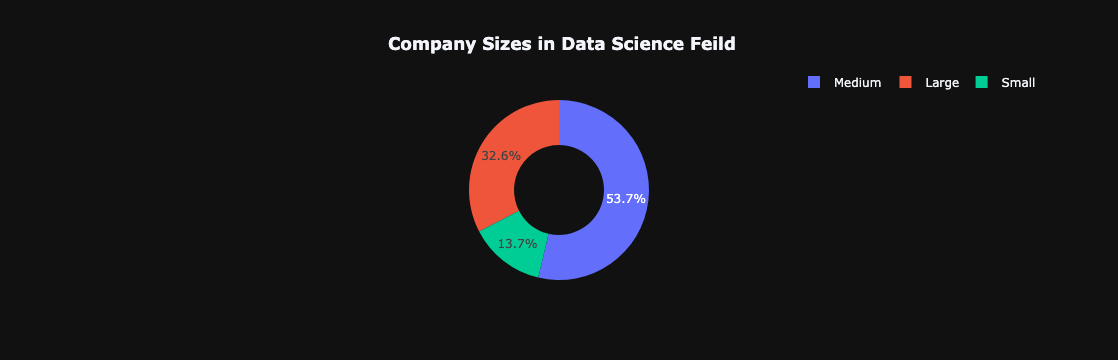

In [34]:
fig=px.pie(df.groupby('company_size',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),
           names='company_size',
           values='salary_in_usd',
           color='company_size',
           hole=0.5,labels={'company_size':'Company Size','salary_in_usd':'count'},
           template='plotly_dark',
           title='<b> Company Sizes in Data Science Feild')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))


#### In the contemporary digital landscape, data has risen to prominence as a pivotal asset for businesses, shaping decision-making processes, fostering innovation, and propelling growth. The deployment of data science solutions, entailing the extraction of valuable insights from extensive datasets, has yielded substantial impacts on company revenues.

#### In the contemporary landscape of e-commerce, the convergence of big data and Customer Relationship Management (CRM) has catalyzed a significant paradigm shift. This transformative integration is not exclusive to large tech conglomerates but also extends its potential to medium and small-sized enterprises. CRM, a strategic concept devised to bolster companies' profitability, empowers organizations to pinpoint and prioritize their most lucrative customer segments. Particularly within the realm of electronic commerce, where Electronic Customer Relationship Management (e-CRM) reigns supreme, the application of CRM principles emerges as a linchpin for success. This holds especially true for business-to-consumer entities and smaller firms, which, despite lacking the vast resources of corporate giants, are compelled to adeptly manage customer relationships to thrive in the digital marketplace. Contrary to conventional wisdom equating a company's tenure on the web with its electronic commerce prowess, the authors posit that success hinges more significantly on the adept execution of CRM strategies. Thus, irrespective of a company's size or longevity in the digital sphere, the effective deployment of CRM methodologies emerges as the cornerstone for sustained competitiveness and growth.

### Example based on the analysis 
#### For mid-cap companies, a deeper examination of e.l.f. Beauty provides illuminating insights(e.l.f. Beauty, Inc,  Annual report 2023). In the fiscal year ending March 31, 2023, the company witnessed a remarkable surge in net sales, soaring by 186.6 million dollars, marking a staggering 48 percent increase from the previous fiscal year's 392.2 million to 578.8 million dollars . This substantial growth was primarily fueled by robust performance across both retail and e-commerce channels. Notably, net sales surged by 158.0 million dollars, a notable 45%, within the retailer channels, while e-commerce channels experienced a remarkable $28.6 million increase, representing an impressive 71% spike. This exemplifies the efficacy of data collection and analysis methodologies employed by smaller companies to optimize revenue streams. Moreover, e.l.f. Beauty underscores the pivotal role of its e-commerce operations within its business model. Their e-commerce platforms serve as integral extensions of their marketing strategies, acting as vital touchpoints for introducing prospective consumers to their brand, product offerings, and enriched content.However, amidst these opportunities lie inherent vulnerabilities. The reliance on e-commerce platforms exposes the company to risks such as website downtime and technical failures. A failure to swiftly address these challenges could potentially curtail e-commerce sales and tarnish the brand's reputation. Thus, it becomes imperative for companies like e.l.f. Beauty to proactively mitigate such risks to ensure sustained growth and brand resilience in the digital sphere. 



#### For the leading entity in the e-commerce domain, Amazon unequivocally stands out as the preeminent corporation, boasting a colossal user base numbering in the billions. According to research on Big Data Techniques of Google, Amazon, Facebook, and Twitter, Amazon currently hosts over 300 million active users (Hewage et al., Review: Big data techniques of google, Amazon, Facebook and Twitter 2018). Within this expansive dataset lies a profound emphasis on Customer Relationship Management (CRM), underlining its critical significance within electronic commerce. Amazon's strategic utilization of big data techniques for CRM exemplifies a sophisticated approach to managing customer interactions and data, serving as a benchmark within the industry. With an intricate understanding of consumer behavior and preferences gleaned from extensive data analysis, Amazon adeptly tailors its services to individual users. This personalized approach manifests in targeted marketing initiatives, precise product recommendations, and refined customer segmentation strategies.Moreover, Amazon's mastery of big data extends beyond CRM, encompassing pivotal functions such as supply chain optimization, inventory management, fraud prevention, and logistical enhancements. By harnessing its robust infrastructure and cutting-edge analytics capabilities, Amazon processes vast data volumes in real-time, facilitating agile decision-making and fostering ongoing innovation.





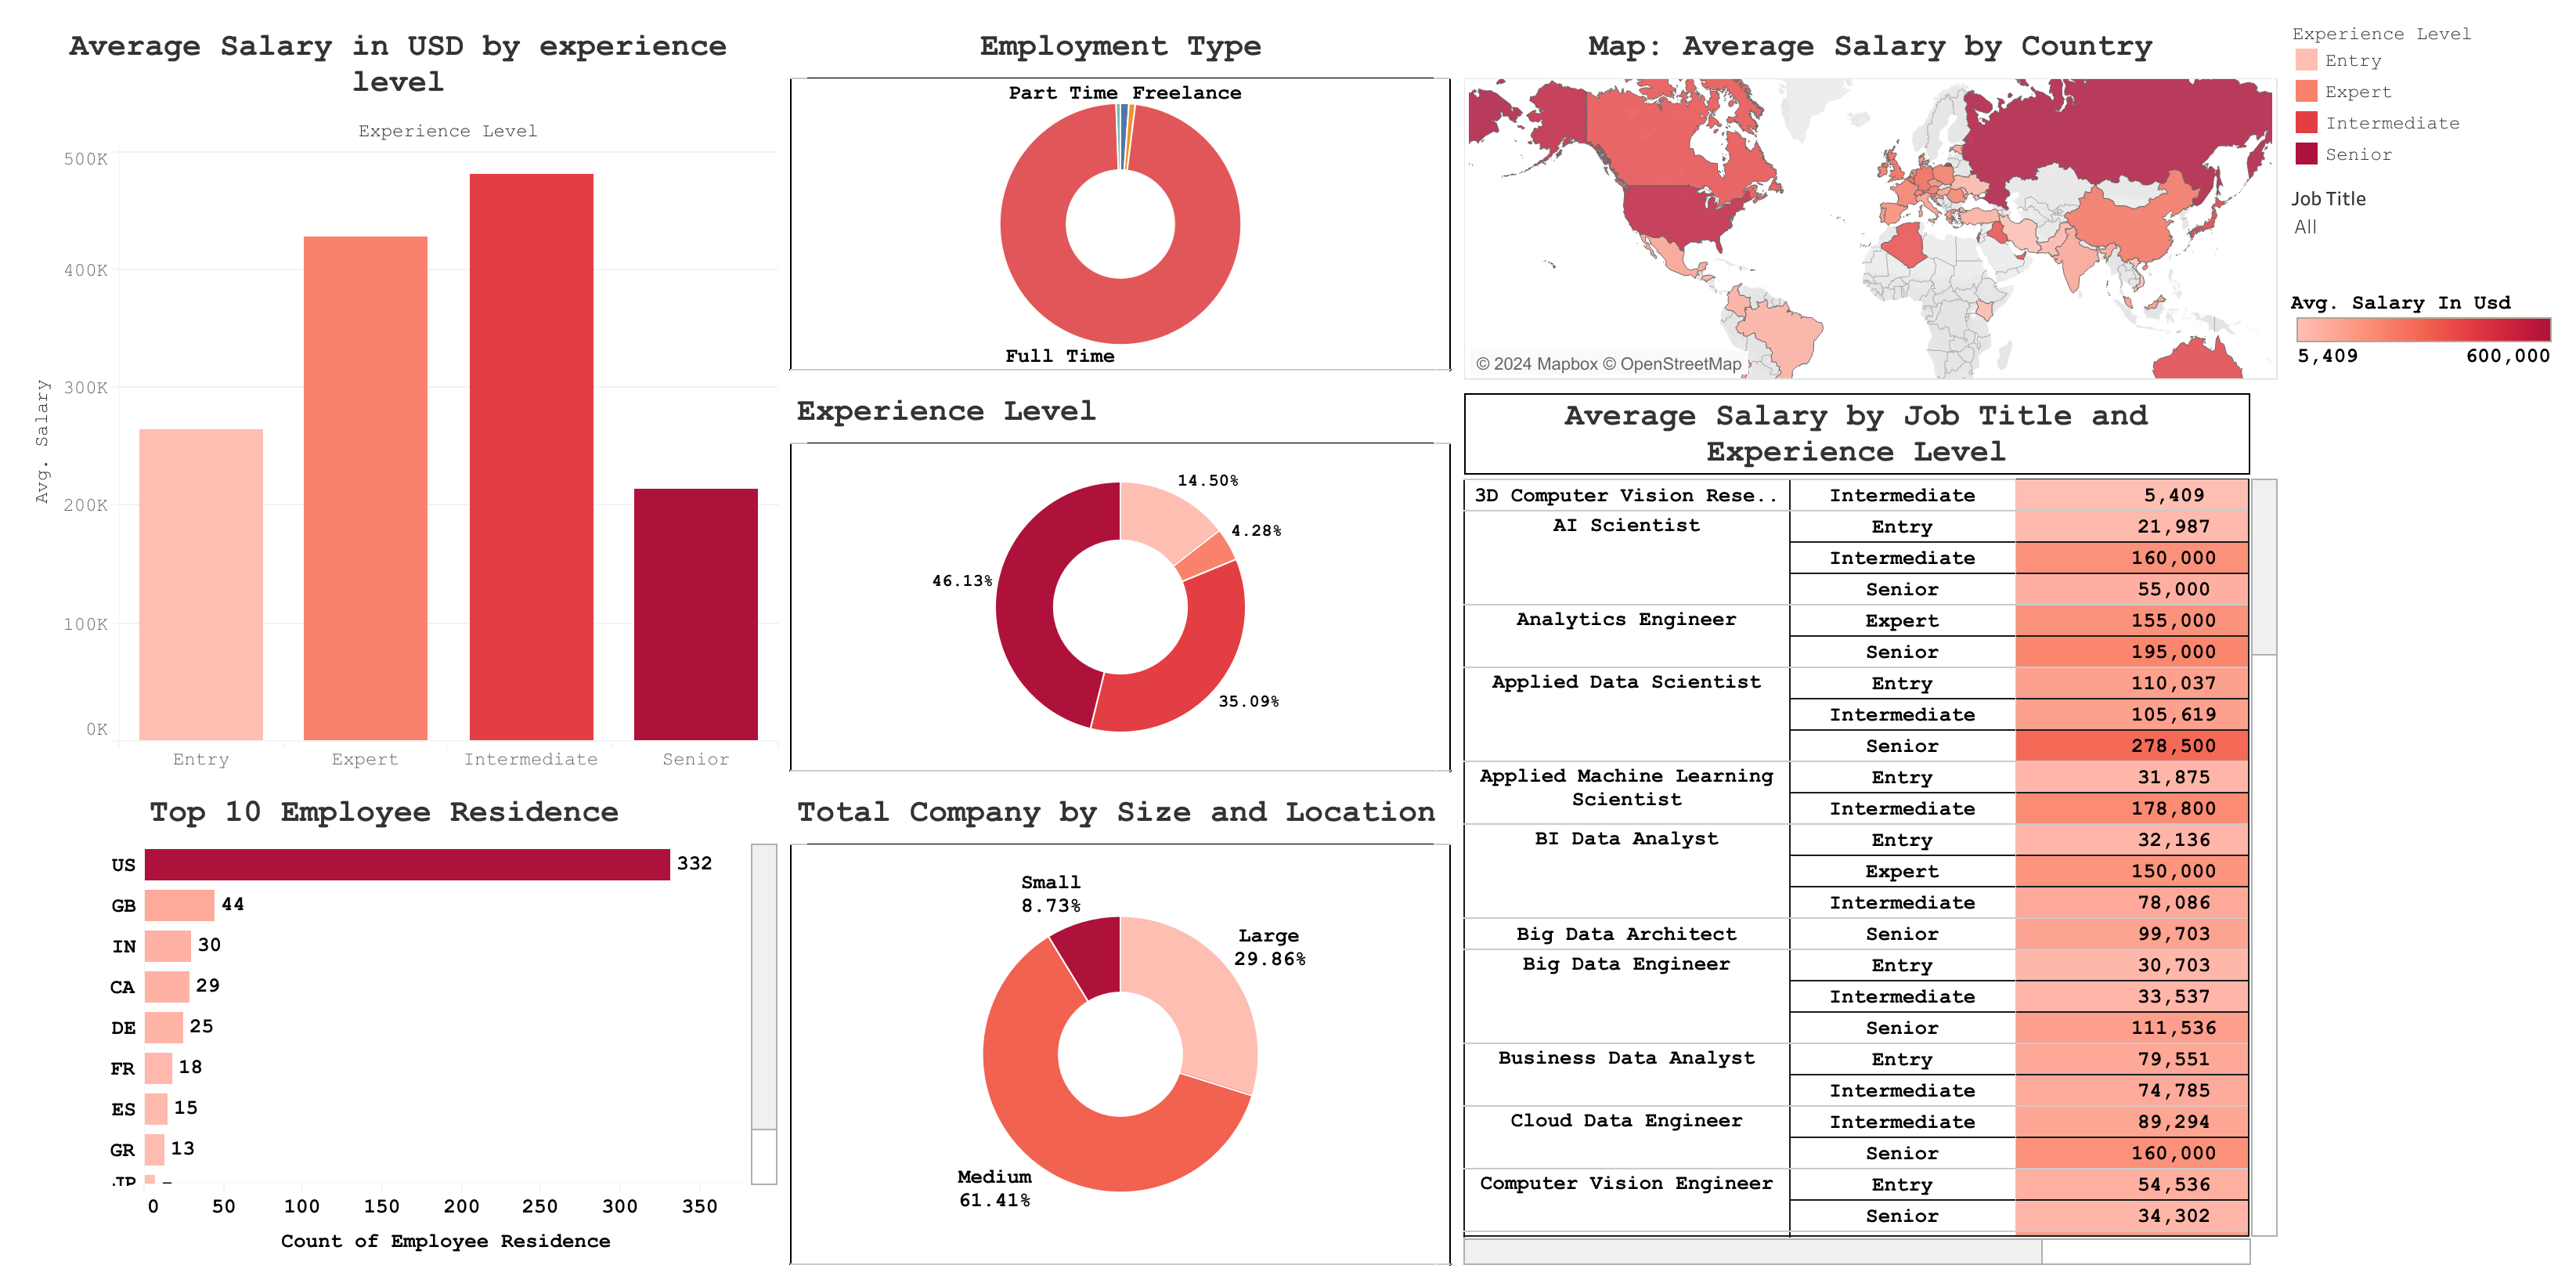

In [35]:
Image(filename='/Users/thienphuquach/Desktop/Research Paper/DS/dashboard2.png')

     ## Figure 1 : Tableau Dashboard Data Science Salary around the world by USD from 2020 to 2023 (Created by Phu Quach) 

#### Following in-depth analysis, it's evident that data science has achieved global prominence, particularly in regions such as Europe, North America, Austria, and select areas in Asia. This widespread recognition underscores the escalating demand for expertise in data-related fields, indicating a substantial surge in their significance. This trend accentuates the growing prominence of data science across diverse industries and sectors.






## VII. Import New Dataset 

In [36]:
df2=pd.read_csv('/Users/thienphuquach/Desktop/salaries.csv')
df2

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Prompt Engineer,56000,EUR,60462,DE,0,DE,S
1,2024,EN,FT,Research Engineer,172800,USD,172800,US,0,US,M
2,2024,EN,FT,Research Engineer,144000,USD,144000,US,0,US,M
3,2024,MI,FT,Data Engineer,65000,EUR,72222,AT,0,AT,M
4,2024,MI,FT,Data Engineer,43000,EUR,47777,AT,0,AT,M
...,...,...,...,...,...,...,...,...,...,...,...
12977,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
12978,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
12979,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
12980,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [37]:
df2['company_size'].replace({'L':'Large','S':'Small','M':'Medium'},inplace=True)
df2['experience_level'].replace({'EN':'Entry Level','MI':'Intermediate','EX':'Expert','SE':'Senior'},inplace=True)
df2['employment_type'].replace({'PT':'Part-Time','FT':'Full-Time','CT':'Contract','FL':'Freelance'},inplace=True)
df2['remote_ratio'] = df2['remote_ratio'].astype(str)
df2['remote_ratio'].replace({'0':'No remote','50':'Partially remote','100':' Fully remote'},inplace=True)

df2

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Intermediate,Full-Time,Prompt Engineer,56000,EUR,60462,DE,No remote,DE,Small
1,2024,Entry Level,Full-Time,Research Engineer,172800,USD,172800,US,No remote,US,Medium
2,2024,Entry Level,Full-Time,Research Engineer,144000,USD,144000,US,No remote,US,Medium
3,2024,Intermediate,Full-Time,Data Engineer,65000,EUR,72222,AT,No remote,AT,Medium
4,2024,Intermediate,Full-Time,Data Engineer,43000,EUR,47777,AT,No remote,AT,Medium
...,...,...,...,...,...,...,...,...,...,...,...
12977,2020,Senior,Full-Time,Data Scientist,412000,USD,412000,US,Fully remote,US,Large
12978,2021,Intermediate,Full-Time,Principal Data Scientist,151000,USD,151000,US,Fully remote,US,Large
12979,2020,Entry Level,Full-Time,Data Scientist,105000,USD,105000,US,Fully remote,US,Small
12980,2020,Entry Level,Contract,Business Data Analyst,100000,USD,100000,US,Fully remote,US,Large


In [38]:
combined_df = pd.concat([df, df2], ignore_index=True)
combined_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Intermediate,Full-Time,Data Scientist,70000,EUR,79833,DE,No remote,DE,Large
1,2020,Senior,Full-Time,Machine Learning Scientist,260000,USD,260000,JP,No remote,JP,Small
2,2020,Senior,Full-Time,Big Data Engineer,85000,GBP,109024,GB,Partially remote,GB,Medium
3,2020,Intermediate,Full-Time,Product Data Analyst,20000,USD,20000,HN,No remote,HN,Small
4,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,150000,US,Partially remote,US,Large
...,...,...,...,...,...,...,...,...,...,...,...
13584,2020,Senior,Full-Time,Data Scientist,412000,USD,412000,US,Fully remote,US,Large
13585,2021,Intermediate,Full-Time,Principal Data Scientist,151000,USD,151000,US,Fully remote,US,Large
13586,2020,Entry Level,Full-Time,Data Scientist,105000,USD,105000,US,Fully remote,US,Small
13587,2020,Entry Level,Contract,Business Data Analyst,100000,USD,100000,US,Fully remote,US,Large


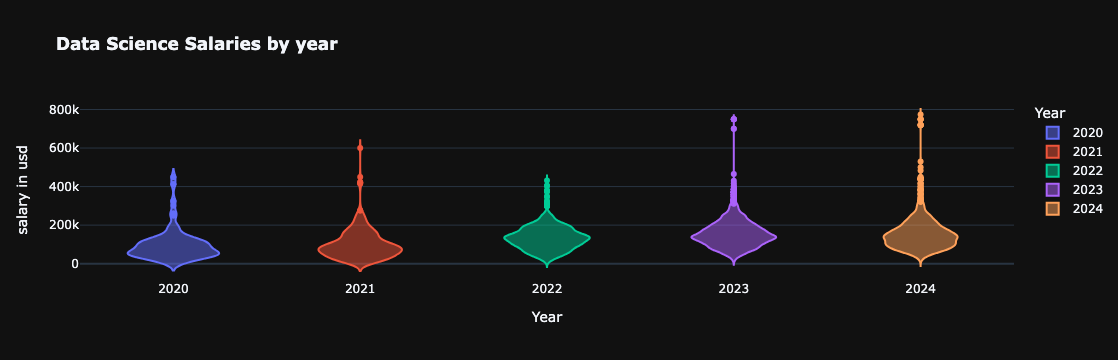

In [39]:
px.violin(combined_df,
          x='work_year',
          y='salary_in_usd',
          color='work_year',
          labels={'work_year':'Year','salary_in_usd':'salary in usd'},
          template='plotly_dark',
          title='<b>Data Science Salaries by year')

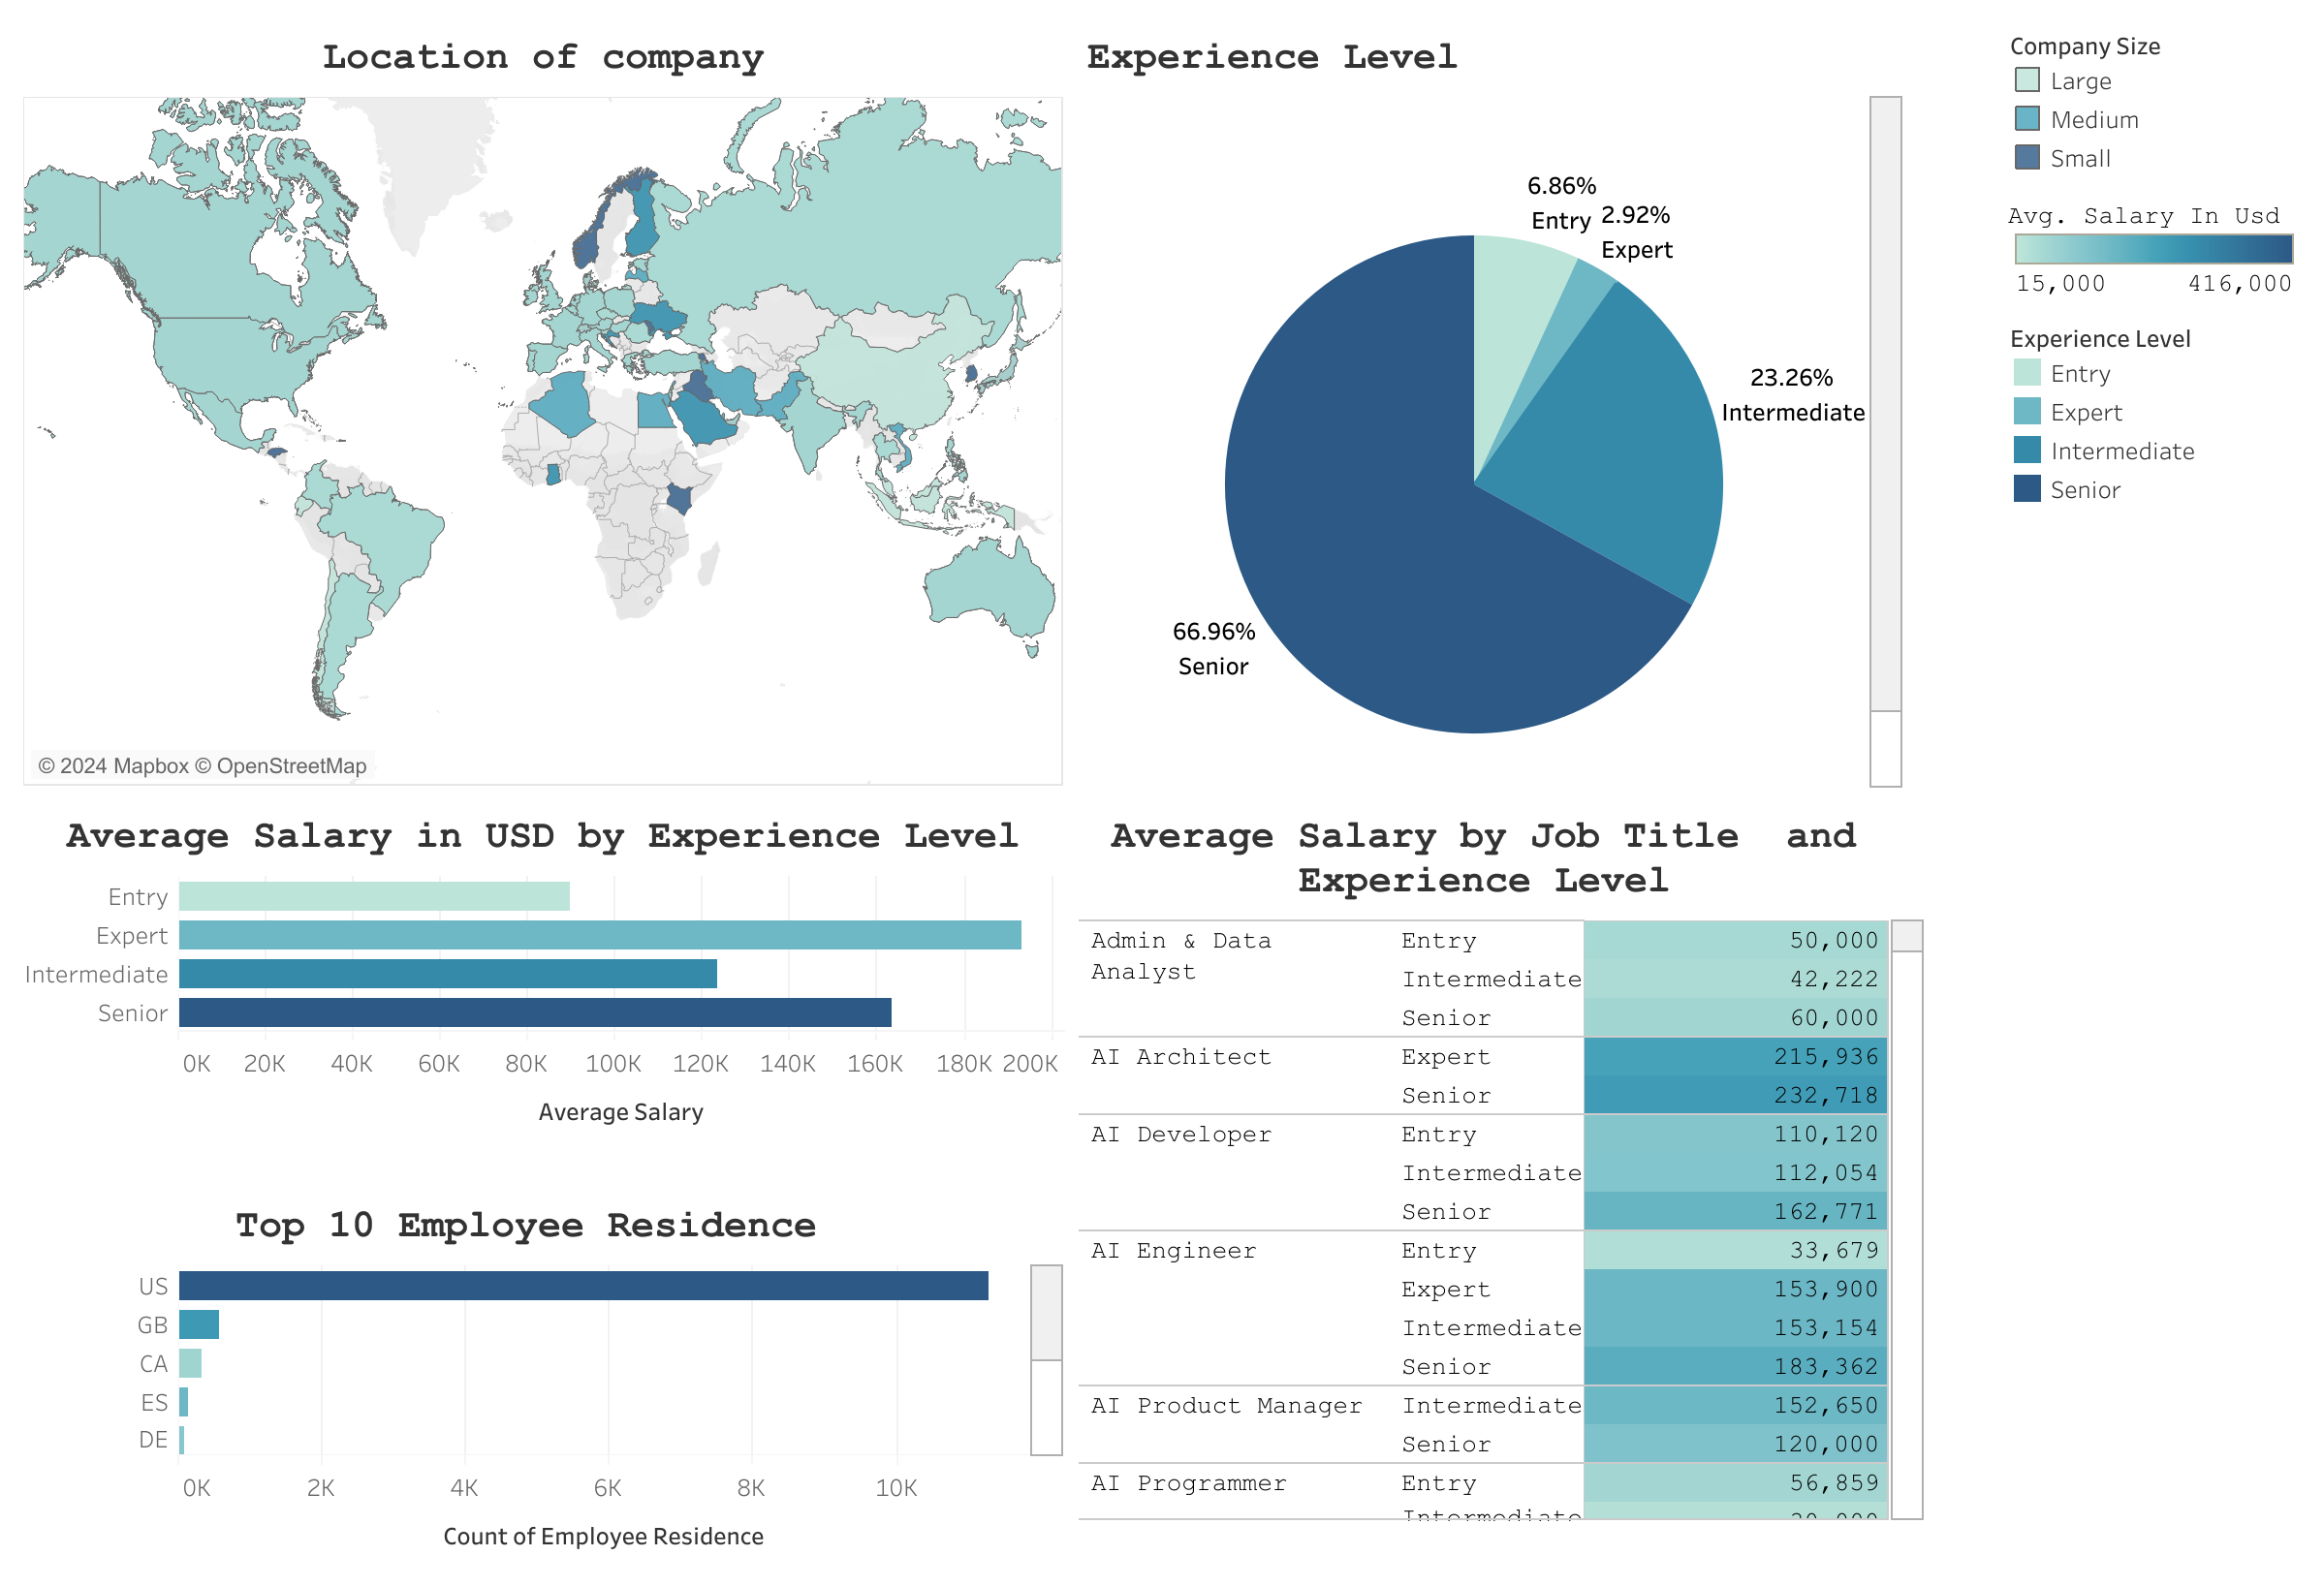

In [40]:
Image(filename='/Users/thienphuquach/Desktop/Research Paper/DS/Dashboard1.PNG')

       Figure 2 : Tableau Dashboard Data Science Salary around the world by USD between 2023 and 2024 (Created by Phu Quach) 

# X.Conclusion 

#### The period spanning from 2020 to 2024 has been characterized by substantial advancements and transformative shifts within the realm of data analysis and data science. Throughout these years, discernible trends have emerged, delineating a trajectory of progress and innovation within the field.Firstly, there has been a continued rise in demand for skilled professionals in data analysis and data science roles. Companies have recognized the importance of leveraging data to gain insights, optimize processes, and drive strategic decision-making. 

#### As a result, there has been a steady increase in job opportunities and career prospects for individuals with expertise in data analysis, machine learning, and artificial intelligence. Additionally, advancements in technology and tools have empowered data scientists to extract deeper insights from complex datasets. The adoption of cloud computing, big data platforms, and automated machine learning solutions has facilitated faster data processing and model development, enabling organizations to derive value from their data more efficiently. Moreover, the integration of data science into various industries, including finance, healthcare, retail, and manufacturing, has led to transformative changes in business operations and customer experiences. Companies have leveraged predictive analytics, recommendation systems, and personalized marketing strategies to enhance customer engagement, improve product offerings, and drive revenue growth. Furthermore, the emphasis on data privacy and ethical considerations has become increasingly important in the data science community. With the implementation of regulations such as GDPR and the growing awareness of data ethics, organizations have prioritized the responsible collection, storage, and usage of data to maintain trust and transparency with customers and stakeholders.

#### Looking ahead, the future of data analysis and data science holds immense potential for innovation and impact. As organizations continue to invest in data-driven initiatives and embrace emerging technologies such as artificial intelligence, machine learning, and predictive analytics, the role of data scientists will become even more critical in driving business success and societal progress.



# VII. References

#### 1.Bollen, R. (2017). Competencies of the Sexiest Job of the 21st Century: Developing and Testing a Measurement Instrument for Data Scientists .


#### 2.Cristescu, M. P., Mara, D. A., Culda, L. C., Nerișanu, R. A., Bâra, A., & Oprea, S.-V. (2023). The Impact of Data Science Solutions on the Company Turnover. https://doi.org/10.20944/preprints202309.0560.v1


#### 3.e.l.f. Beauty, Inc. (2023, March 31). Annual report 2023 . https://investor.elfbeauty.com/stock-and-financial/latest-annual-report-and-proxy-statement


#### 4.Hewage, T. N., Halgamuge, M. N., Syed, A., & Ekici, G. (2018). Review: Big data techniques of google, Amazon, Facebook and Twitter. Journal of Communications, 94–100. https://doi.org/10.12720/jcm.13.2.94-100


#### 5.Ho, A., Nguyen, A., Pafford, J., & Slater, R. (2019). A Data Science Approach to Defining a Data Scientist. SMU Data Science Review, 2.


#### 6.Rot, A., Sobinska, M., & Busch, P. (2023). Programming teams in Remote Working Environments: An analysis of performance and productivity. 2023 13th International Conference on Advanced Computer Information Technologies (ACIT). https://doi.org/10.1109/acit58437.2023.10275614

